In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import skimage.draw as draw


In [2]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [3]:
def data_load():
    image = io.imread('raw.jpeg', as_gray=True) 
    mask = io.imread('mask.png', as_gray=True) 
    print("raw image shape : ", image.shape)
    print("mask image shape: ", mask.shape)
#     image_show(image);
#     image_show(mask);
    
    # for i in range (240, 301):  # y axis
    #     for j in range (330, 381):  # x axis
    #         print(mask[i][j])
    return image, mask

# image, mask = data_load()

In [4]:
# as1, bs1, ae1, be1 = 240, 330, 305, 380
# as2, bs2, ae2, be2 = 340, 310, 392, 390

def image_processing(image, rc1, rc2):
    my_mask = np.ones(shape=image.shape[0:2], dtype="bool")
    as1, bs1, ae1, be1 = rc1
    rr1, cc1 = draw.rectangle(start=(as1, bs1), end=(ae1, be1))
    my_mask[rr1, cc1] = False
    as2, bs2, ae2, be2 = rc2
    rr2, cc2 = draw.rectangle(start=(as2, bs2), end=(ae2, be2))
    my_mask[rr2, cc2] = False

    image[my_mask] = 0
#     image_show(image);
    
    
    fig, ax = plt.subplots(1, 1)
    ax.hist(image.ravel(), bins=64, range=[0, 1])
    ax.set_xlim(0.3, 0.9);
    ax.set_ylim(0, 800);

# image_processing(image)

In [15]:
# threshold = 0.57

def segmentation(image, threshold, rc1, rc2):
    as1, bs1, ae1, be1 = rc1
    as2, bs2, ae2, be2 = rc2
    
    for i in range (as1, ae1+1):  # y axis
        for j in range (bs1, be1+1):  # x axis
            if image[i][j] > threshold:
                image[i][j] = 255

    for i in range (as2, ae2+1):
        for j in range (bs2, be2+2):
            if image[i][j] > threshold:
                image[i][j] = 255

    image_show(image);
    
# segmentation(image, threshold)

In [16]:
def metrics(image, mask, threshold):
    
    #-----------------------------------------------------------
    # Calculate number of positive samples/pixels in both grayscale image and mask
    #-----------------------------------------------------------
    
    mask_cnt = 0
    my_cnt = 0

    for i in range (image.shape[0]): # y axis
        for j in range (image.shape[1]): # x axis
            mask_cnt += mask[i][j]
            my_cnt += int(image[i][j]//255)
    print("\n------------------------------------------------------")
    print("Number of white pixels in mask           : ", mask_cnt)
    print("Number of white pixels in processed image: ", my_cnt)

    #-----------------------------------------------------------
    # Calculate metrics for Confusion Matrix
    #-----------------------------------------------------------
    
    TP, FN, FP, TN = 0, 0, 0, 0
    for i in range (image.shape[0]): # y axis
        for j in range (image.shape[1]): # x axis
            if mask[i][j] == 1:
                if image[i][j] == 255:
                    TP += 1
                else:
                    FN += 1
            else:
                if image[i][j] == 255:
                    FP += 1
                else:
                    TN += 1

    print("\n------------------------------------------------------")
    print("True Pos : ", TP)
    print("True Neg : ", TN)
    print("False Pos: ", FP)
    print("False Neg: ", FP)

    #-----------------------------------------------------------
    # Calculate metrics for algorithm performance
    #-----------------------------------------------------------
    
    Recall = TP / (TP + FN)
    Precision = TP / (TP + FP)
    Accuracy = (TP + TN) / (TP + FN + TN + FP)
    F1 = 2 * TP / (2*TP + FP + FN)
    print("\n------------------------------------------------------")
    print("Threshold: {0: 1.2f}  ".format(threshold))
    print("Recall   : {0: 2.1f} %".format(100 * Recall))
    print("Precision: {0: 2.1f} %".format(100 * Precision))
    print("Accuracy : {0: 2.1f} %".format(100 * Accuracy))
    print("F1       : {0: 2.1f} %".format(100 * F1))    

    
# metrics(image, mask, threshold)

In [17]:
def main():
    
    image, mask = data_load()
    
    rc1 = (240, 330, 305, 380)  # as1, bs1, ae1, be1 
    rc2 = (340, 310, 392, 390)  # as2, bs2, ae2, be2

    image_processing(image, rc1, rc2)
    
    threshold = 0.57
    
    segmentation(image, threshold, rc1, rc2)
    metrics(image, mask, threshold)
    
    return image

raw image shape :  (843, 597)
mask image shape:  (843, 597)

------------------------------------------------------
Number of white pixels in mask           :  4618
Number of white pixels in processed image:  4596

------------------------------------------------------
True Pos :  4286
True Neg :  498343
False Pos:  310
False Neg:  310

------------------------------------------------------
Threshold:  0.57  
Recall   :  92.8 %
Precision:  93.3 %
Accuracy :  99.9 %
F1       :  93.0 %


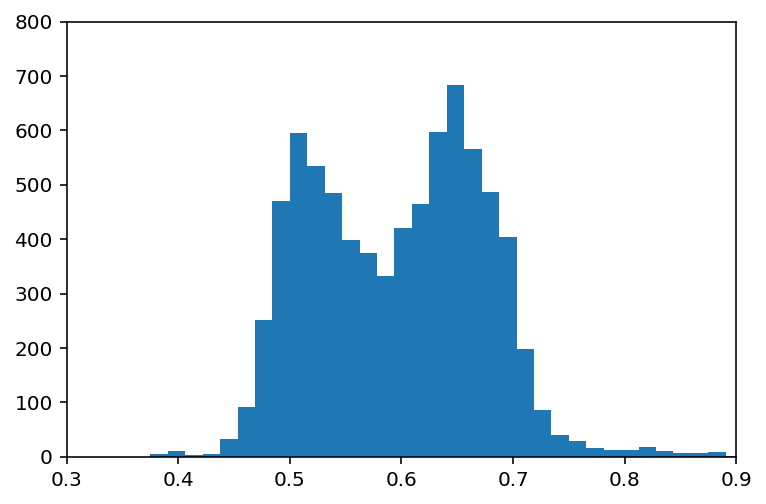

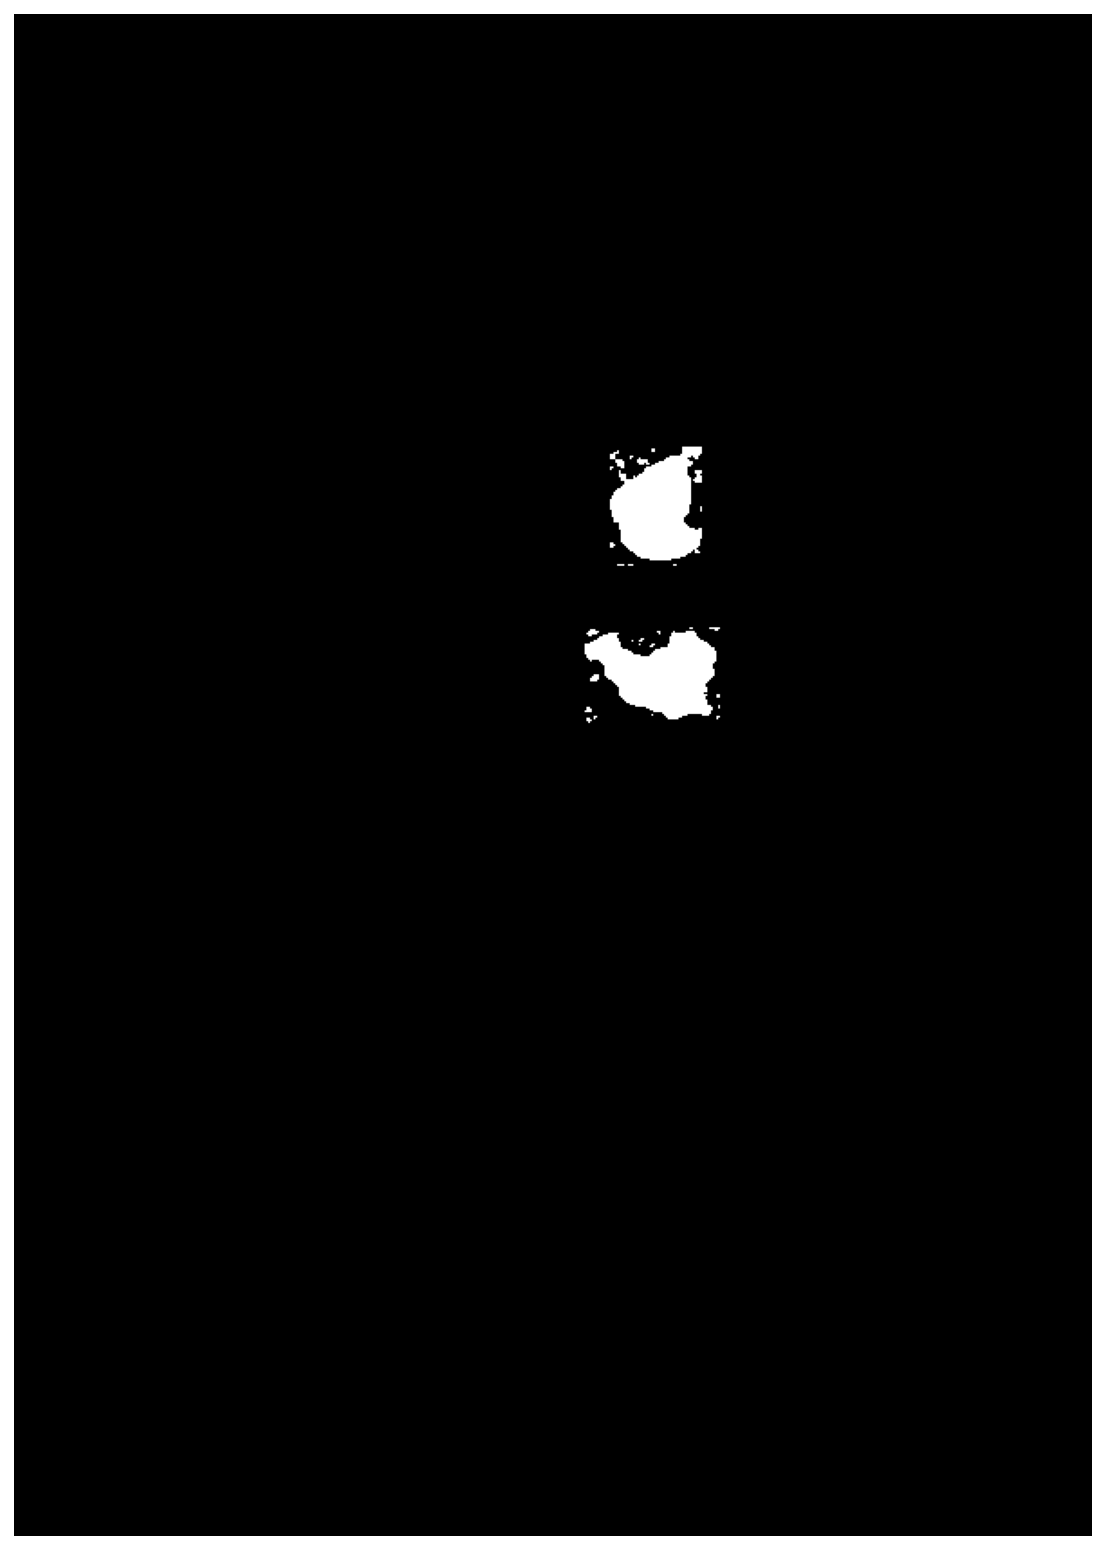

In [18]:
image = main()